## [Part 1 Simple Feedback Learning (50 points)](#Part-1-Simple-Feedback-Learning)  

**Simple Feedback Learning** uses the correct/incorrect feedback and info about (y>d) or (y<d) to change weights.  
- Refer to **Perceptron slides**  

### Build Model (40 points)  
1. Calculate the output (10 points)  
2. Implement weight adjustment (20 points)  
3. Predict function (5 points)  
4. Activation function (5 points)  

### Evaluate Model (10 points)  
Use the predict function to predict the labels with the test dataset (5 points)  
Evaluate the prediction results (5 points)  
- Evaluation matrics include confusion matrix, accuracy, recall, precision and F1 score

## [Part 2 Error Correction Learning (50 points)](#Part-2-Error-Correction-Learning)  

**Error Correction Learning** uses an error measure to adapt the weight vector.  
- Refer to **Adaline slides**  

### Build Model (40 points)  
1. Calculate the output (10 points)  
2. Implement weight adjustment (20 points)  
3. Predict function (5 points)  
4. Activation function (5 points)  

### Evaluate Model (10 points)  
Use the predict function to predict the lables with the test dataset (5 points)  
Evaluate the prediction results (5 points)  
- Evaluation matrics include confusion matrix, accuracy, recall, precision and F1 score

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
x = data.data
x = (x - x.mean(axis=0)) / x.std(axis=0)
y = data.target - 1
data.feature_names, data.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

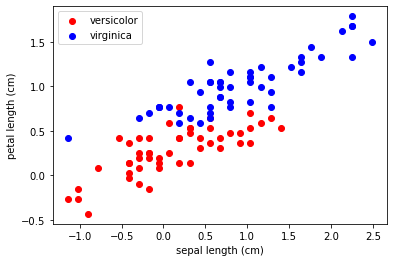

In [3]:
# data visualization
x_axis, y_axis = 0, 2
plt.scatter(x[50:100, x_axis], x[50:100, y_axis], color='r', label=data.target_names[1])
plt.scatter(x[100:, x_axis], x[100:, y_axis], color='b', label=data.target_names[2])
plt.legend()
plt.xlabel(data.feature_names[x_axis])
plt.ylabel(data.feature_names[y_axis])
plt.show()

In [4]:
# split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x[50:], y[50:], test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((80, 4), (20, 4), (80,), (20,))

In [5]:
def evaluator(y_test, y_pred):
    ####################################################################################################
    # enter code here to implement the evaluation matrices including confusion matrix, accuracy, precision and recall
    # DO NOT use any python packages such as scikit-learn
    true_pos=0
    false_pos=0
    true_neg=0
    false_neg = 0
    for idx,test in enumerate(y_test):
        
        if test == y_pred[idx]:
            if y_pred[idx] == 1:
                true_pos += 1
            else:
                true_neg += 1
        else:
            if y_pred[idx] ==1:
                false_pos += 1
            else:
                false_neg += 1
    confusion_matrix = [[true_neg, false_pos],[false_neg, true_pos]]
    accuracy = (true_pos + true_neg)/ (true_pos + true_neg + false_pos + false_neg)
    precision = true_pos/(true_pos + false_pos)
    recall = true_pos/(true_pos + false_pos)
    f1 = 2*((precision*recall)/(precision + recall))
    print("Confusion Matrix")
    print(confusion_matrix[0])
    print(confusion_matrix[1])
    print("Accuracy: "+ str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("F1 Score: " + str(f1))
            


    ####################################################################################################
print(y_test)

[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]


## Part 1 Simple Feedback Learning

In [6]:
class SimpleFeedbackLearning(object):
    def __init__(self):
        self.history = {}
        self.history['train_acc'] = []
        self.history['test_acc'] = []
        
    def f(self, x):
        ####################################################################################################
        # 4. enter code here to implement the activation function
        fx = np.where(x>0,1,0)
        
       
        ####################################################################################################
        return fx
    
    def train(self, x, y, x_test, y_test, learning_rate=0.1, n_iters=10, verbose=True):
        n_train, input_size = x.shape
        n_test = x_test.shape[0]
        # weight initialization
        self.W = np.zeros(input_size)
        self.b = np.zeros(1)

        for i in range(n_iters):

            for xi, yi in zip(x, y):
                # forward
                ####################################################################################################
                # 1. enter code here to calculate the output
                output = np.dot(xi, self.W) + self.b
                d = self.f(output)
                
                ####################################################################################################
                
                # backward
                ####################################################################################################
                # 2. enter code here to adjust the weights
             
               
                if yi > d:
                    self.W += learning_rate*xi
                    self.b += learning_rate
                if yi < d:
                    self.W -= learning_rate*xi
                    self.b -= learning_rate
                    
                ####################################################################################################
           
            train_acc = (self.predict(x) == y).sum() / n_train
            test_acc = (self.predict(x_test) == y_test).sum() / n_test
            self.history['train_acc'].append(train_acc)
            self.history['test_acc'].append(test_acc)
            if verbose:
                print('epoch %d, train acc %.4f, test acc %.4f' % (i + 1, train_acc, test_acc))

    def predict(self, x):
        ####################################################################################################
        # 3. enter code here to complete the predict function
        # TODO: use the trained weights to predict labels and return the predicted labels
        line = np.dot(x, self.W) + self.b
        y_pred = self.f(line)
       
        ####################################################################################################
        return y_pred

In [7]:
model1 = SimpleFeedbackLearning()
model1.train(x_train, y_train, x_test, y_test, learning_rate=0.001, n_iters=10, verbose=True)

epoch 1, train acc 0.9375, test acc 0.9000
epoch 2, train acc 0.9000, test acc 0.7500
epoch 3, train acc 0.9125, test acc 0.8000
epoch 4, train acc 0.8875, test acc 0.7500
epoch 5, train acc 0.9625, test acc 0.8000
epoch 6, train acc 0.9750, test acc 0.9000
epoch 7, train acc 0.9750, test acc 0.9000
epoch 8, train acc 0.9625, test acc 0.9000
epoch 9, train acc 0.9375, test acc 0.8000
epoch 10, train acc 0.9625, test acc 0.9000


In [8]:
model1.W, model1.b

(array([-0.00065431, -0.00174029,  0.00639307,  0.00499676]), array([-0.006]))

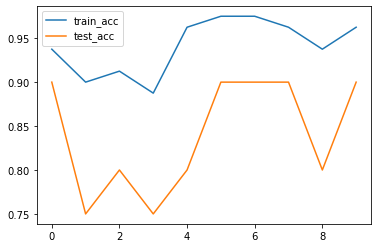

In [9]:
plt.plot(model1.history['train_acc'], label='train_acc')
plt.plot(model1.history['test_acc'], label='test_acc')
plt.legend()
plt.show()

In [10]:
y_pred = model1.predict(x_test)
evaluator(y_test, y_pred)

Confusion Matrix
[8, 2]
[0, 10]
Accuracy: 0.9
Precision: 0.8333333333333334
Recall: 0.8333333333333334
F1 Score: 0.8333333333333334


## Part 2 Error Correction Learning

In [26]:
class ErrorCorrectionLearning(object):
    def __init__(self):
        self.history = {}
        self.history['train_error'] = []
        self.history['train_acc'] = []
        self.history['test_acc'] = []
        
    def f(self, x):
        ####################################################################################################
        # 4. enter code here to implement the activation function
        fx = x
        ####################################################################################################
        return fx
    
    def train(self, x, y, x_test, y_test, learning_rate=0.1, n_iters=10, verbose=True):
   
        n_train, input_size = x.shape
        n_test = x_test.shape[0]
        self.W = np.zeros(input_size)
        self.b = np.zeros(1)

        for i in range(n_iters):
            error = 0.0
            for xi, yi in zip(x, y):
                # forward
                ####################################################################################################
                # 1. enter code here to calculate the output
                output = np.dot(xi, self.W) + self.b
                d = self.f(output)
                
                ####################################################################################################
                
                # backward
                ####################################################################################################
                # 2. enter code here to adjust the weights
                err = yi - d
                update = learning_rate* err
                self.W += update*xi
                self.b += update
                ####################################################################################################


                error += np.abs(err)
                
            self.history['train_error'].append(error)
            train_acc = (self.predict(x) == y).sum() / n_train
            test_acc = (self.predict(x_test) == y_test).sum() / n_test
         
            self.history['train_acc'].append(train_acc)
            self.history['test_acc'].append(test_acc)
            if verbose:
                print('epoch %d, train error %.4f, train acc %.4f, test acc %.4f' % 
                      (i + 1, error, train_acc, test_acc))

    def predict(self, x):
        ####################################################################################################
        # 3. enter code here to complete the predict function
        # TODO: use the trained weights to predict labels and return the predicted labels
        line = np.dot(x, self.W) + self.b
        y_preds = self.f(line)
        y_pred= []
        for y in y_preds:
            if y> 0.7:
                y_pred.append(1)
            else:
                y_pred.append(0)
        
                
        ####################################################################################################
        return y_pred

In [27]:
model2 = ErrorCorrectionLearning()
model2.train(x_train, y_train, x_test, y_test, learning_rate=0.01, n_iters=10, verbose=True)

epoch 1, train error 29.7840, train acc 0.7625, test acc 0.8500
epoch 2, train error 22.4097, train acc 0.8125, test acc 0.8500
epoch 3, train error 21.0082, train acc 0.8375, test acc 0.8500
epoch 4, train error 20.1690, train acc 0.8500, test acc 0.9000
epoch 5, train error 19.4819, train acc 0.8625, test acc 0.9000
epoch 6, train error 18.9308, train acc 0.8625, test acc 0.9000
epoch 7, train error 18.4861, train acc 0.8625, test acc 0.9500
epoch 8, train error 18.0805, train acc 0.8750, test acc 0.9500
epoch 9, train error 17.7425, train acc 0.8750, test acc 0.9500
epoch 10, train error 17.4735, train acc 0.8750, test acc 0.9500


In [28]:
model2.W, model2.b

(array([ 0.01590016, -0.08223672,  0.3414232 ,  0.4642391 ]),
 array([-0.01258554]))

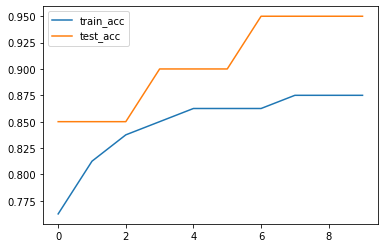

In [29]:
plt.plot(model2.history['train_acc'], label='train_acc')
plt.plot(model2.history['test_acc'], label='test_acc')
plt.legend()
plt.show()

In [30]:
y_pred = model2.predict(x_test)
evaluator(y_test, y_pred)

Confusion Matrix
[10, 0]
[1, 9]
Accuracy: 0.95
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
